In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Processing
import importlib

from project_code import processing_functions as pf, visualization_functions as vf

from datetime import datetime as dt
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



# Data Acquisition 

We collect data from two geolocations that correspond to Bordj Badji Mokhtar, Algeria, and Toronto, ON, Canada. It will be sourced through Open-Meteo's free Historical Weather API, which does not require a developer key for access.

## Selections for Data Download 

**General Details:**

- Data Source: https://open-meteo.com/en/docs/historical-weather-api

**Bordj Badji Mokhtar Details:**

- Latitude: 21.3292
- Longitude: 0.94791 
- Timezone: We set our Virtual Private Network (VPN) to 'DZ' (Algeria) and Timezone to 'Automatically detect time zone' because Central European Time (GMT +1) or equivalent is not available as an option
- Start Date: 1994-01-01
- End Date: 2023-12-31

**Toronto Details:**

- Latitude: 43.70011  
- Longitude: -79.4163  
- Timezone: America/New_York  (shares the same timezone as Toronto)
- Start Date: 1994-01-01 
- End Date: 2023-12-31 

**Hourly Weather Variables:**
- Temperature (2 m)
- Relative Humidity (2 m)

**Additional Variables:**
- Sunshine Duration

Although Daily Weather Variables are directly available, Relative Humidity information is only available under Hourly Variables, so we procure the data at that level of granularity. Additionally, we are collecting information from 1995 onwards so that we can have a large enough dataset for deep learning purposes, but only 2002 to 2006 will be used in the current analysis.

**Settings:**

- Temperature Unit: Celsius  
- Wind Speed Unit: Km/h  
- Precipitation Unit: Millimeter  
- Timeformat: ISO 8601 (e.g. 2022-12-31)


**API Calls:**

    - https://archive-api.open-meteo.com/v1/era5?latitude=21.3292&longitude=0.94791&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=auto

    - https://archive-api.open-meteo.com/v1/era5?latitude=43.70011&longitude=-79.4163&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=America%2FNew_York

Per the documentation, we specify 'era5' in the API call in order to get data from the ERA5 reanalysis model, thereby ensuring data consistency and preventing the capture of unintentional alterations that may have arisen from the adoption of different weather model upgrades. 



In [2]:
# Download data from Open Meteo
file_path = '../../data/raw_data/'
file_name_bbm = 'era5_data_BordjBadjiMokhtar.json'
file_name_to = 'era5_data_Toronto.json'
api_call_bbm = 'https://archive-api.open-meteo.com/v1/era5?latitude=21.3292&longitude=0.94791&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=auto'
api_call_to = 'https://archive-api.open-meteo.com/v1/era5?latitude=43.70011&longitude=-79.4163&start_date=1994-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,sunshine_duration&timezone=America%2FNew_York'

pf.download_data(api_call_bbm, file_path, file_name_bbm)
pf.download_data(api_call_to, file_path, file_name_to)

Data successfully downloaded to ../../data/raw_data/era5_data_BordjBadjiMokhtar.json.
Data successfully downloaded to ../../data/raw_data/era5_data_Toronto.json.


In [3]:
# read in data 
file_bbm = f'{file_path}{file_name_bbm}'
file_to = f'{file_path}{file_name_to}'

weather_bbm = pf.df_from_json(file_bbm)
weather_bbm.name = 'weather_bbm (Bordj Badji Mokhtar)'
weather_to = pf.df_from_json(file_to)
weather_to.name = 'weather_to (Toronto)'

pf.generate_df_summary(weather_bbm)
print('\n\n')
pf.generate_df_summary(weather_to)


Dataframe: weather_bbm (Bordj Badji Mokhtar)

------ Head: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
0,1994-01-01T00:00,12.4,34,0.0
1,1994-01-01T01:00,11.4,36,0.0
2,1994-01-01T02:00,10.5,37,0.0
3,1994-01-01T03:00,9.7,37,0.0
4,1994-01-01T04:00,8.9,37,0.0




------ Tail: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
262963,2023-12-31T19:00,24.4,11,0.0
262964,2023-12-31T20:00,21.5,13,0.0
262965,2023-12-31T21:00,20.4,13,0.0
262966,2023-12-31T22:00,19.3,13,0.0
262967,2023-12-31T23:00,18.0,14,0.0




------ Column Summaries: ------


,count,unique,top,freq
time,262968,262968,1994-01-01T00:00,1


,count,mean,std,min,25%,50%,75%,max
temperature_2m,262968.0,28.040200,9.081526,1.4,21.3,28.8,35.2,46.9
relative_humidity_2m,262968.0,18.812570,11.562204,2.0,11.0,16.0,24.0,99.0
sunshine_duration,262968.0,1623.146004,1761.774532,0.0,0.0,0.0,3600.0,3600.0




------ Counts: ------

Rows: 262,968
Columns: 4
Duplicate Rows = 0 | % of Total Rows = 0.0%


------ Info: ------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   time                  262968 non-null  object 
 1   temperature_2m        262968 non-null  float64
 2   relative_humidity_2m  262968 non-null  int64  
 3   sunshine_duration     262968 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ MB


None



------ Missing Data Percentage: ------


time                    0.0
temperature_2m          0.0
relative_humidity_2m    0.0
sunshine_duration       0.0
dtype: float64




Dataframe: weather_to (Toronto)

------ Head: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
0,1994-01-01T00:00,-1.5,79,0.0
1,1994-01-01T01:00,-1.3,79,0.0
2,1994-01-01T02:00,-1.2,79,0.0
3,1994-01-01T03:00,-0.8,78,0.0
4,1994-01-01T04:00,-0.8,78,0.0




------ Tail: ------


,time,temperature_2m,relative_humidity_2m,sunshine_duration
262963,2023-12-31T19:00,0.4,82,0.0
262964,2023-12-31T20:00,0.3,84,0.0
262965,2023-12-31T21:00,0.2,88,0.0
262966,2023-12-31T22:00,0.2,89,0.0
262967,2023-12-31T23:00,0.1,89,0.0




------ Column Summaries: ------


,count,unique,top,freq
time,262968,262968,1994-01-01T00:00,1


,count,mean,std,min,25%,50%,75%,max
temperature_2m,262968.0,8.473418,10.570363,-25.5,0.5,8.5,17.5,34.2
relative_humidity_2m,262968.0,71.939468,14.832891,19.0,62.0,73.0,84.0,100.0
sunshine_duration,262968.0,1239.656417,1650.560324,0.0,0.0,0.0,3600.0,3600.0




------ Counts: ------

Rows: 262,968
Columns: 4
Duplicate Rows = 0 | % of Total Rows = 0.0%


------ Info: ------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   time                  262968 non-null  object 
 1   temperature_2m        262968 non-null  float64
 2   relative_humidity_2m  262968 non-null  int64  
 3   sunshine_duration     262968 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ MB


None



------ Missing Data Percentage: ------


time                    0.0
temperature_2m          0.0
relative_humidity_2m    0.0
sunshine_duration       0.0
dtype: float64

In [4]:
# rename columns 
mapper = {
    'temperature_2m' : 'temp',
    'relative_humidity_2m' : 'humidity',
}

weather_bbm.rename(columns=mapper, inplace=True)
weather_bbm['time'] = pd.to_datetime(weather_bbm['time'])

weather_to.rename(columns=mapper, inplace=True)
weather_to['time'] = pd.to_datetime(weather_to['time'])

weather_bbm_subset = weather_bbm.loc[(weather_bbm['time'].dt.year >= 2002) & (weather_bbm['time'].dt.year <= 2006)].reset_index(drop=True)
weather_to_subset = weather_to.loc[(weather_to['time'].dt.year >= 2002) & (weather_to['time'].dt.year <= 2006)].reset_index(drop=True)


In [5]:
weather_bbm_subset.head()

,time,temp,humidity,sunshine_duration
0,2002-01-01 00:00:00,15.1,21,0.0
1,2002-01-01 01:00:00,14.1,23,0.0
2,2002-01-01 02:00:00,13.1,26,0.0
3,2002-01-01 03:00:00,12.1,29,0.0
4,2002-01-01 04:00:00,11.1,32,0.0


In [6]:
# get daily aggregations 
df_daily_bbm = pf.daily_aggregations_v2(weather_bbm_subset)
df_daily_bbm['temp_range'] = df_daily_bbm['temp_max'] - df_daily_bbm['temp_min']

df_daily_to = pf.daily_aggregations_v2(weather_to_subset)
df_daily_to['temp_range'] = df_daily_to['temp_max'] - df_daily_to['temp_min']


In [7]:
print('Bordj Badji Mokhtar:\n')
display(df_daily_bbm.describe())

print('Toronto:\n')
display(df_daily_to.describe()) 

Bordj Badji Mokhtar:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,10.966889,19.272088,19.813308,27.991249,34.950767,15.137459
std,1.248268,9.803195,7.457630,7.532607,7.351731,2.677154
min,0.000000,4.291667,2.400000,11.012500,15.900000,4.600000
25%,10.246092,12.750000,13.525000,21.479167,28.700000,13.500000
50%,11.201583,17.104167,21.200000,29.958333,36.900000,15.300000
75%,12.000000,23.500000,26.600000,35.087500,41.500000,17.000000
max,12.084483,85.708333,32.100000,38.766667,46.000000,21.800000


Toronto:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,8.225841,72.724740,4.951150,8.326775,11.725465,6.774315
std,4.337435,10.450756,10.472877,10.402114,10.455243,2.772005
min,0.000000,37.708333,-24.400000,-20.158333,-16.300000,0.700000
25%,5.127224,65.250000,-2.300000,0.450000,3.225000,4.700000
50%,8.875101,72.687500,4.800000,7.902083,11.100000,6.600000
75%,11.848292,80.500000,14.475000,18.009375,21.200000,8.500000
max,14.366889,99.000000,25.800000,28.891667,32.900000,22.700000


Bordj Badji Mokhtar


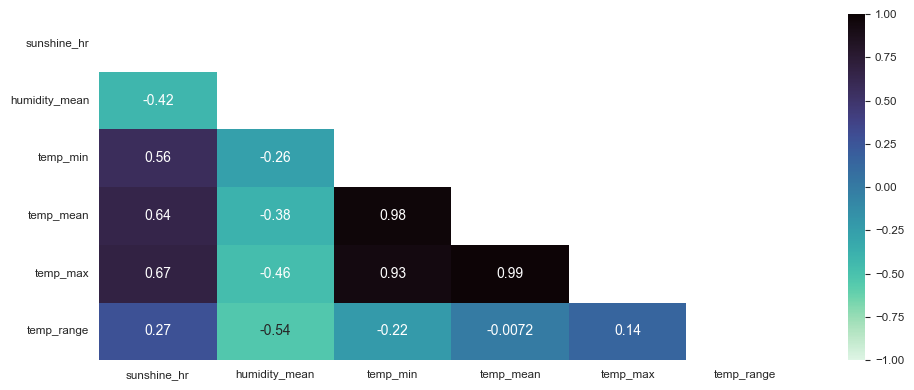

In [8]:
sns.set_style("white")
print('Bordj Badji Mokhtar')
vf.correlation_matrix(df_daily_bbm, figsize=(10,4), cmap='mako_r')

Toronto


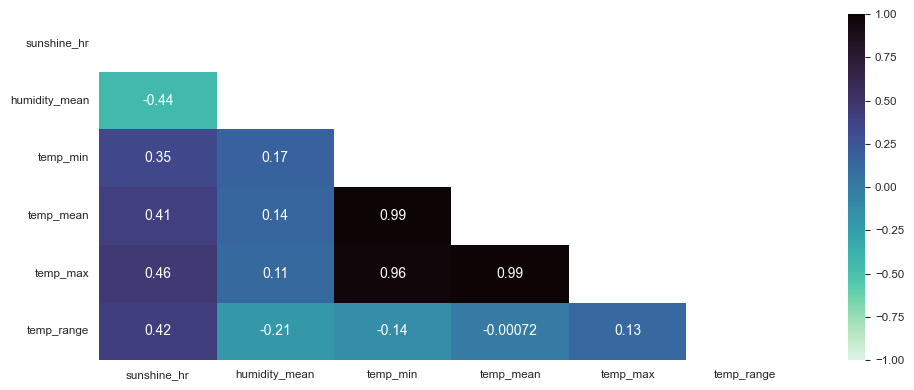

In [9]:
print('Toronto')
vf.correlation_matrix(df_daily_to, figsize=(10,4), cmap='mako_r')

Bordj Badji Mokhtar



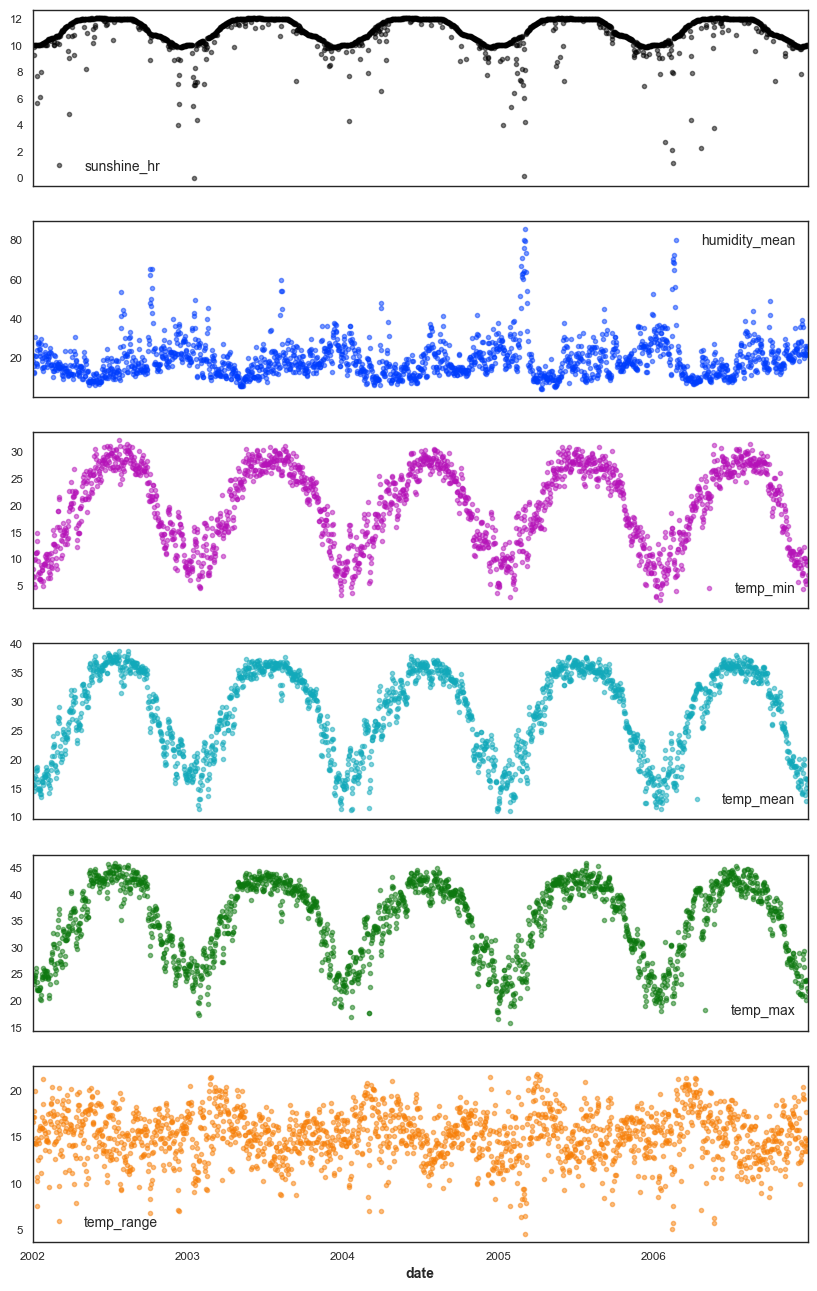

Toronto



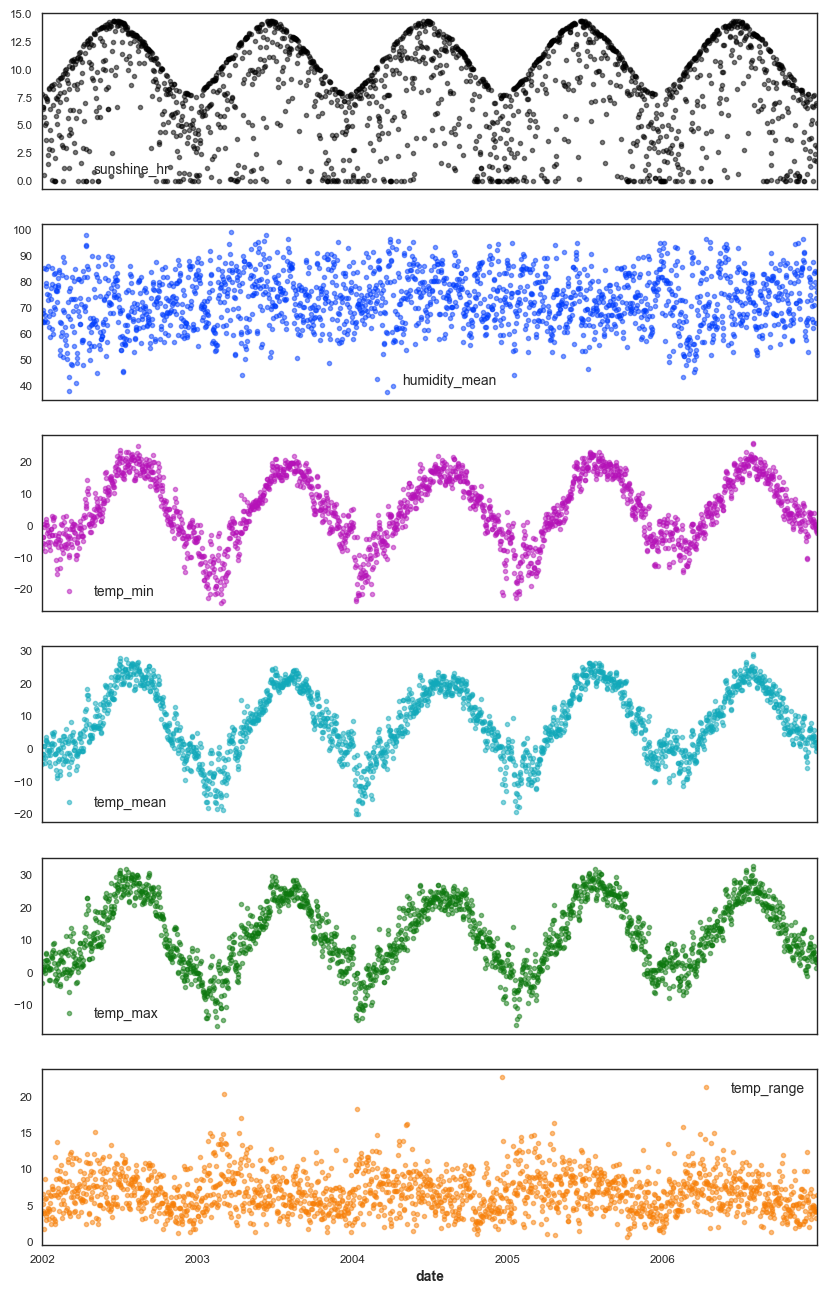

In [10]:
# sns.set_style("whitegrid", {'grid.linestyle': ':'})

print('Bordj Badji Mokhtar\n')

df_daily_bbm.plot(marker='.', alpha=0.5,
                                               linestyle='None',
                                                figsize=(10, 16),
                                                subplots=True)
plt.show()

print('Toronto\n')

df_daily_to.plot(marker='.', alpha=0.5,
                                               linestyle='None',
                                                figsize=(10, 16),
                                                subplots=True)
plt.show()

Let us zero in on Sunshine Duration via decomposition.

Bordj Badji Mokhtar:

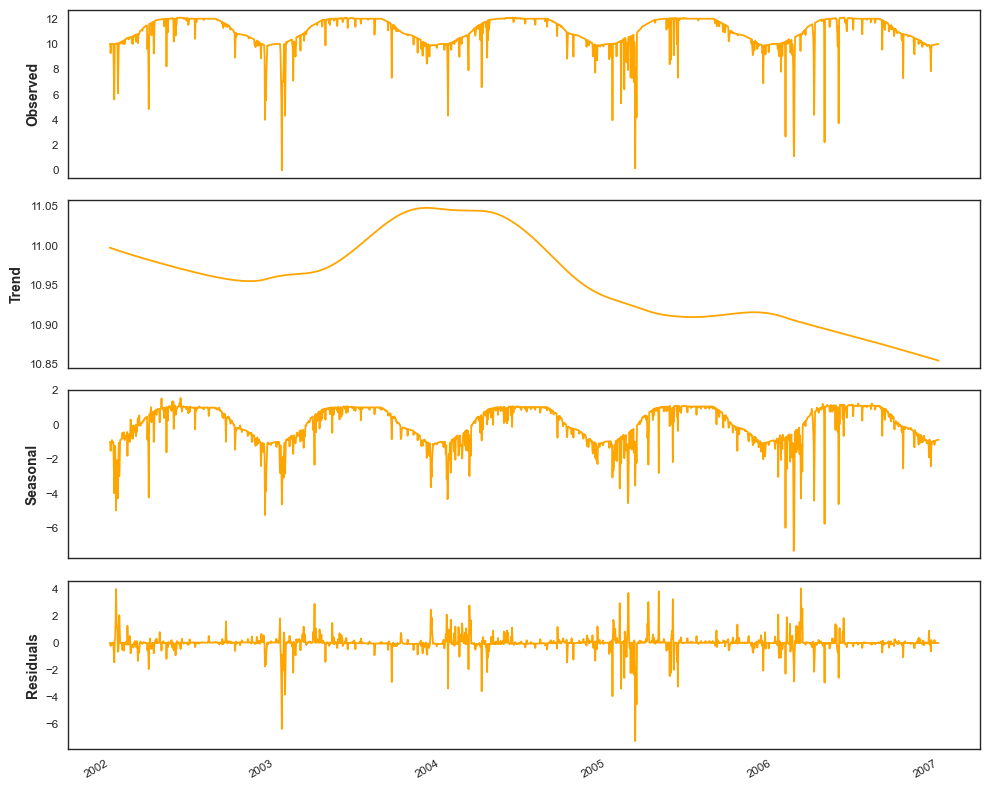

In [11]:
vf.plot_seasonal_decomposition(df_daily_bbm, 'sunshine_hr', period=365, color='orange')

Toronto:

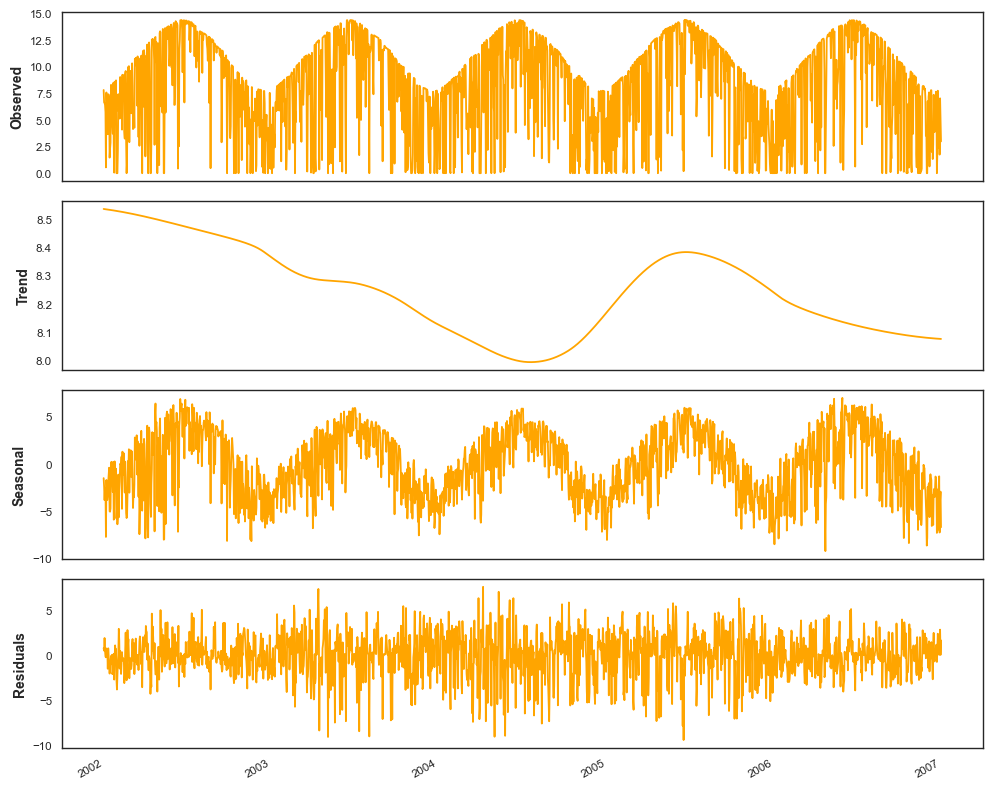

In [12]:
vf.plot_seasonal_decomposition(df_daily_to, 'sunshine_hr', period=365, color='orange')

We now turn our attention to the distribution of values in our main field of interest:

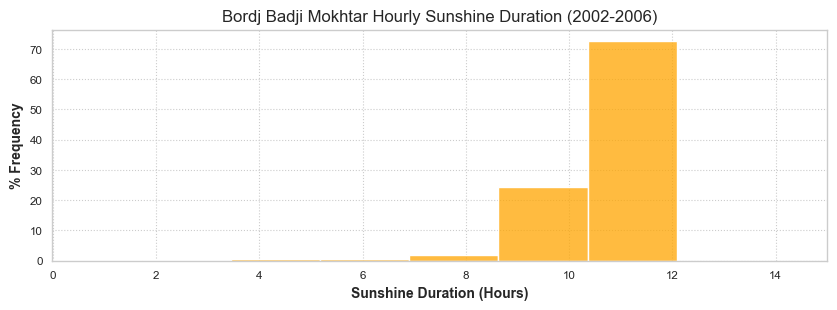

In [13]:
sns.set_style("whitegrid", {'grid.linestyle': ':'})
plt.figure(figsize=(10,3))
sns.histplot(df_daily_bbm, x='sunshine_hr', bins=7, color='orange',
            stat='percent')
plt.title('Bordj Badji Mokhtar Hourly Sunshine Duration (2002-2006)')
plt.xlabel('Sunshine Duration (Hours)')
plt.ylabel('% Frequency')
plt.xlim(-0.01, 15)
plt.grid(True)
plt.savefig('hourly_sunshine_duration.png')
plt.show()

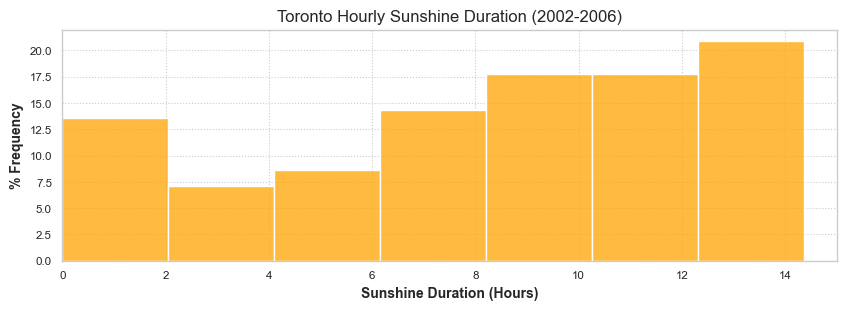

In [14]:
# sns.set_style("whitegrid", {'grid.linestyle': ':'})
plt.figure(figsize=(10,3))
sns.histplot(df_daily_to, x='sunshine_hr', bins=7, color='orange',
            stat='percent')
plt.title('Toronto Hourly Sunshine Duration (2002-2006)')
plt.xlabel('Sunshine Duration (Hours)')
plt.ylabel('% Frequency')
plt.xlim(-0.01, 15)
plt.grid(True)
plt.savefig('hourly_sunshine_duration.png')
plt.show()

For the next part of the analysis, we will create some time-based variables.

In [15]:
for df_daily in [df_daily_bbm, df_daily_to]:
    df_daily['year'] = df_daily.index.year
    df_daily['month'] = df_daily.index.month
    df_daily['day_of_year'] = df_daily.index.day_of_year

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

month_label_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
               'Sep', 'Oct', 'Nov', 'Dec']


We can now generate some monthly and annual stats:

Bordj Badji Mokhtar:



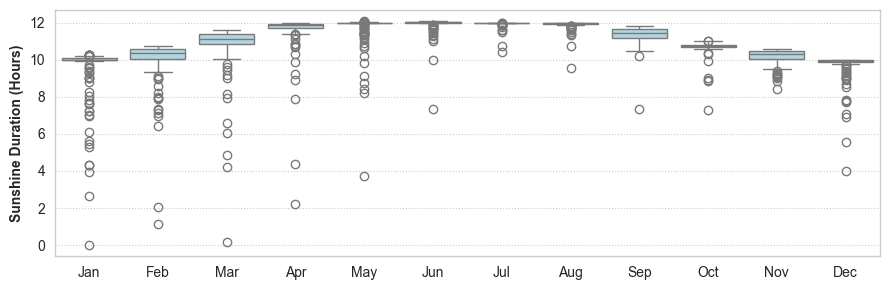

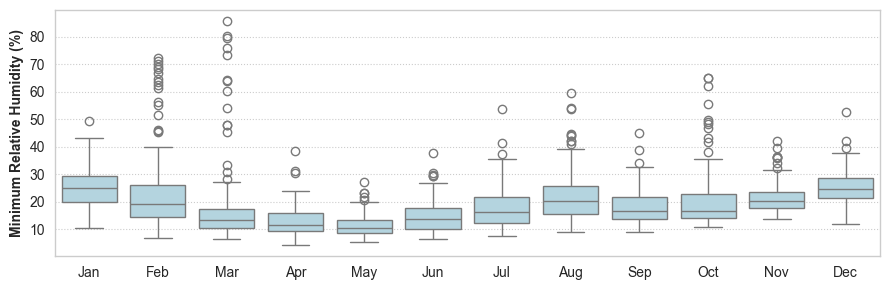

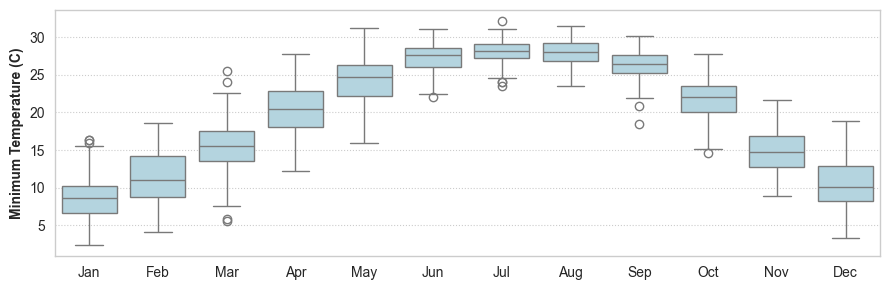

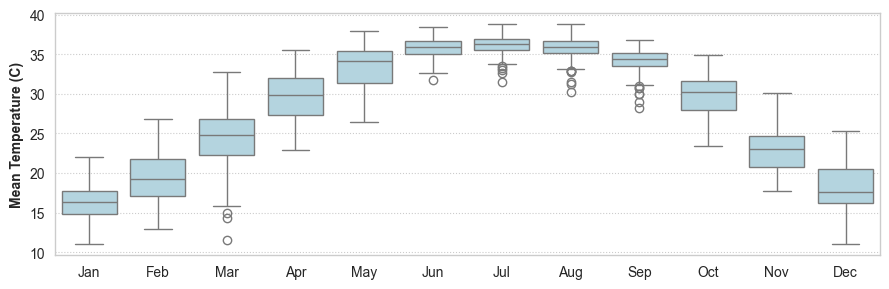

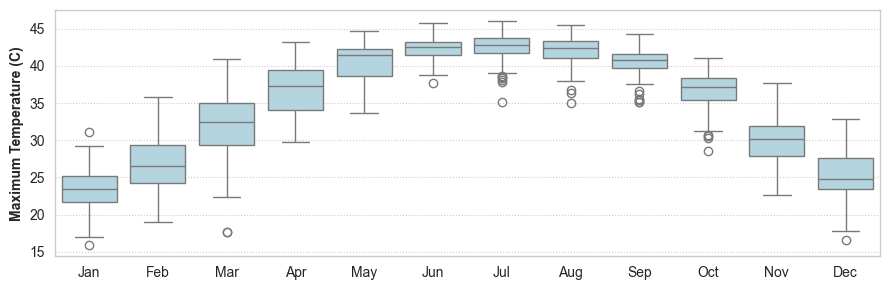

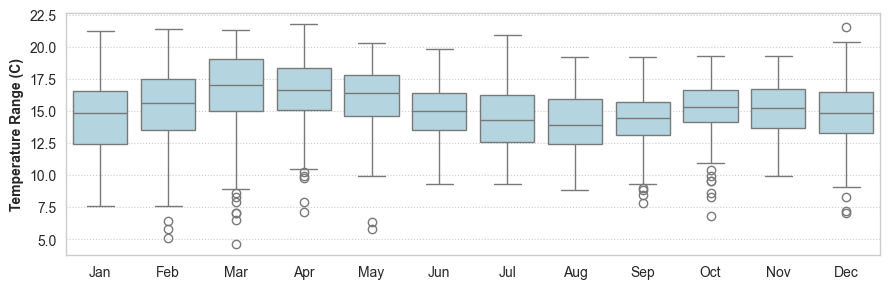



Toronto:



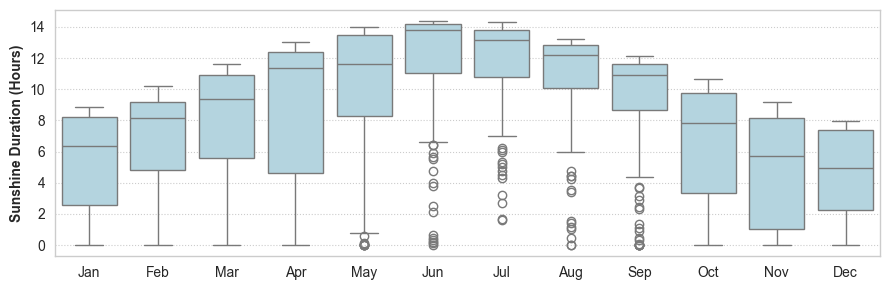

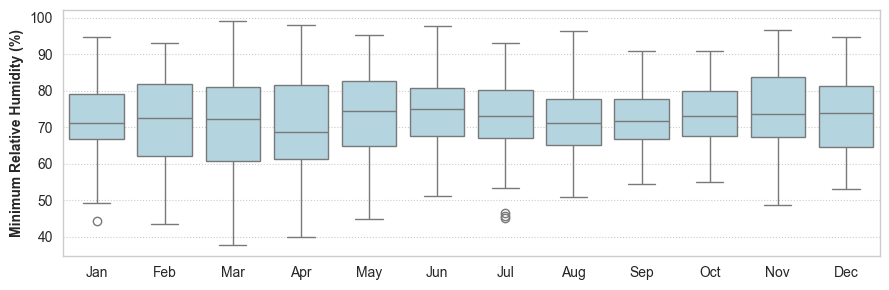

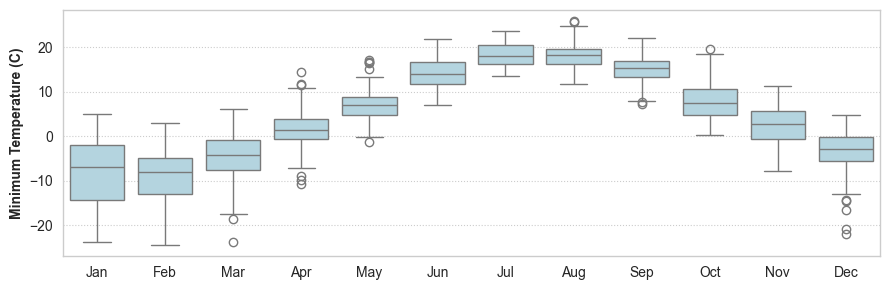

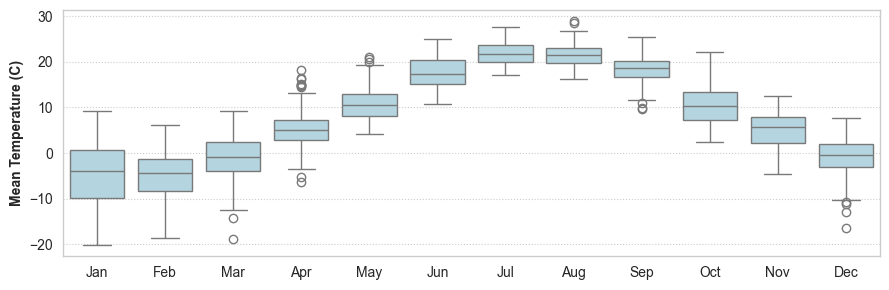

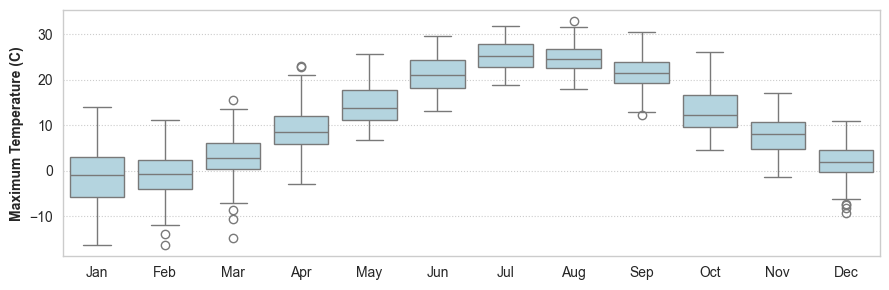

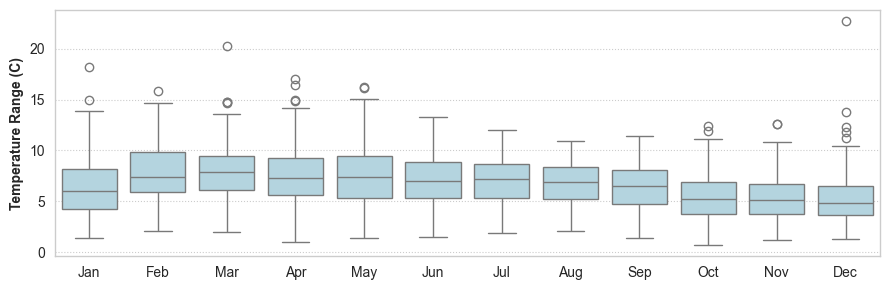

In [16]:
y_labels = {
    'sunshine_hr': 'Sunshine Duration (Hours)',
    'temp_min': 'Minimum Temperature (C)', 
    'temp_mean': 'Mean Temperature (C)',
    'temp_max': 'Maximum Temperature (C)', 
    'temp_range': 'Temperature Range (C)',
    'humidity_mean': 'Minimum Relative Humidity (%)',
}

cols_to_plot = df_daily_bbm.columns[:-3]

importlib.reload(vf) 
importlib.reload(pf) 
print('Bordj Badji Mokhtar:\n')
vf.generate_boxplots(data=df_daily_bbm, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

print('\n\nToronto:\n')
vf.generate_boxplots(data=df_daily_to, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

Rather than looking at global outliers, we first assess them using a monthly lens. Although we will ultimately complete the experiments leaving them intact (to follow the lead of El-Kenawy et al, as well as to assess the models' robustness to outliers), for now we adjust the outlier values in each column by capping them at +/- 1.5 * IQR (i.e. the limits beyond which a data point is generally considered to be an outlier). 

In [17]:
print('Bordj Badji Mokhtar:\n')
df_clean_bbm = pf.adjust_outliers(df_daily_bbm, columns=cols_to_plot, granularity='month')

print('\n\nToronto:\n')
df_clean_to = pf.adjust_outliers(df_daily_to, columns=cols_to_plot, granularity='month')

Bordj Badji Mokhtar:

Total outliers adjusted in the sunshine_hr column: 227
Percent of total rows: 12.43%


Total outliers adjusted in the humidity_mean column: 82
Percent of total rows: 4.49%


Total outliers adjusted in the temp_min column: 15
Percent of total rows: 0.82%


Total outliers adjusted in the temp_mean column: 23
Percent of total rows: 1.26%


Total outliers adjusted in the temp_max column: 25
Percent of total rows: 1.37%


Total outliers adjusted in the temp_range column: 32
Percent of total rows: 1.75%




Toronto:

Total outliers adjusted in the sunshine_hr column: 68
Percent of total rows: 3.72%


Total outliers adjusted in the humidity_mean column: 4
Percent of total rows: 0.22%


Total outliers adjusted in the temp_min column: 24
Percent of total rows: 1.31%


Total outliers adjusted in the temp_mean column: 24
Percent of total rows: 1.31%


Total outliers adjusted in the temp_max column: 14
Percent of total rows: 0.77%


Total outliers adjusted in the temp_range c

We review the boxplots anew:

Bordj Badji Mokhtar:



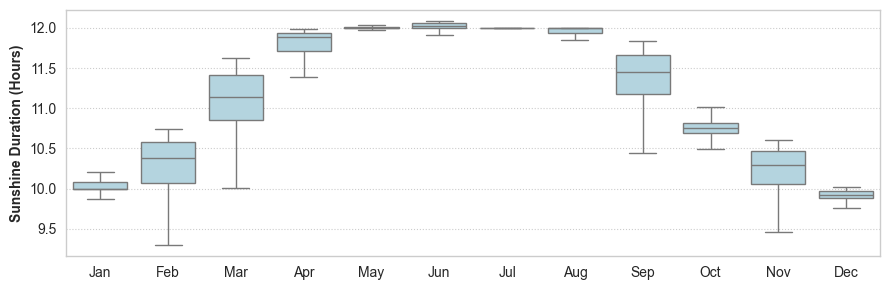

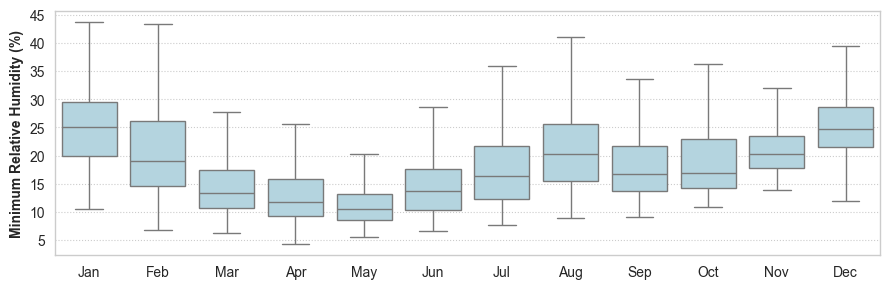

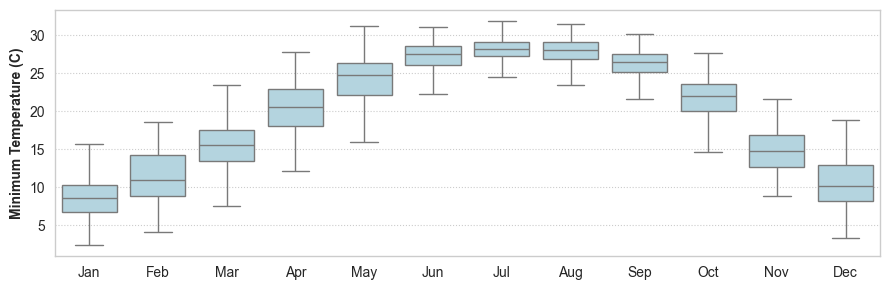

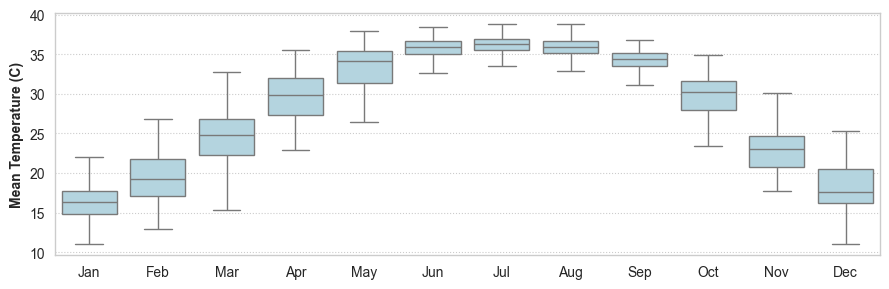

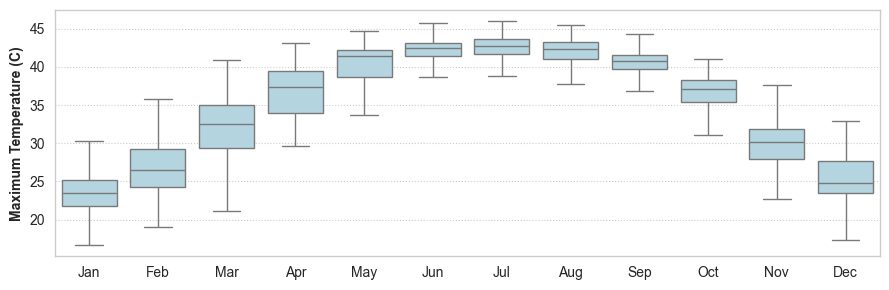

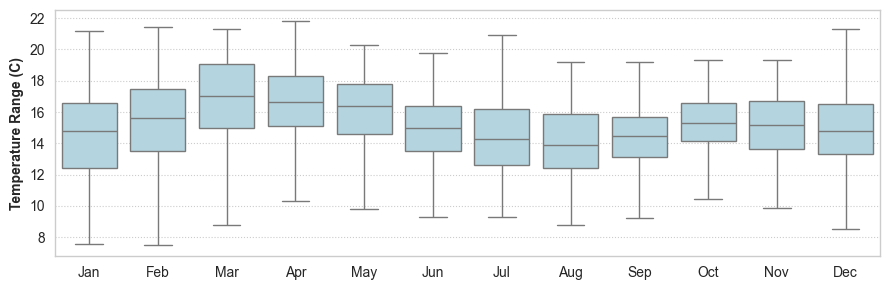



Toronto:



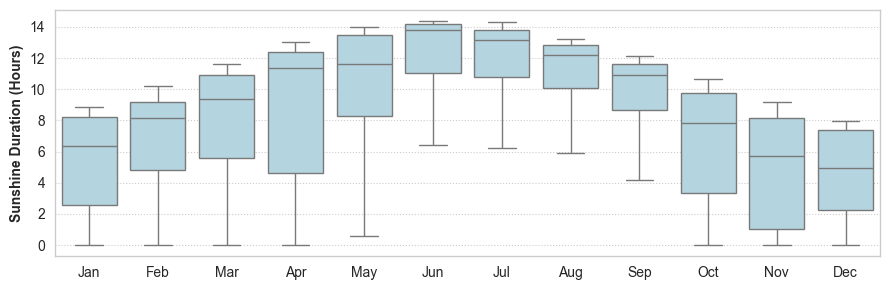

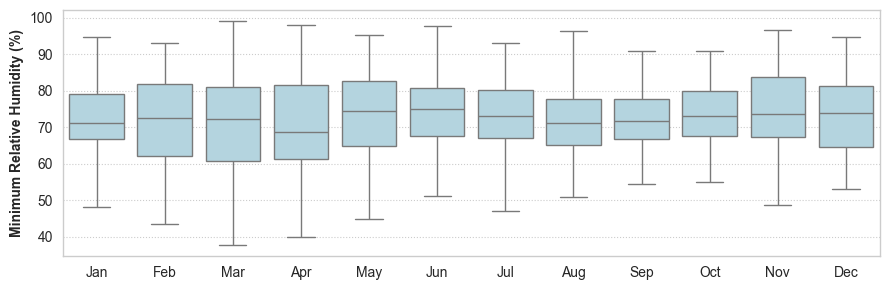

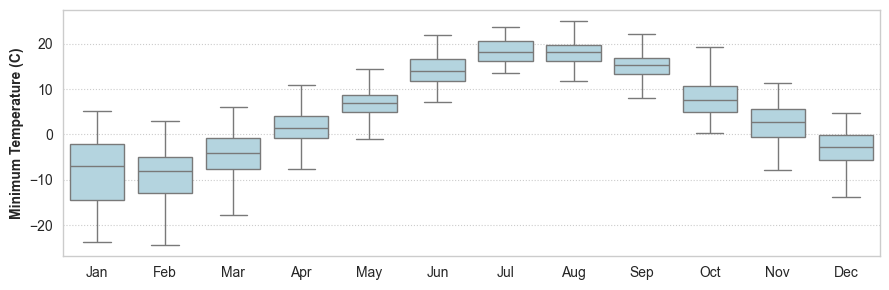

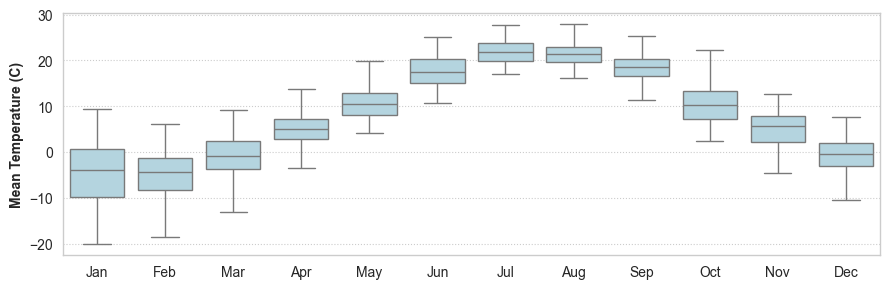

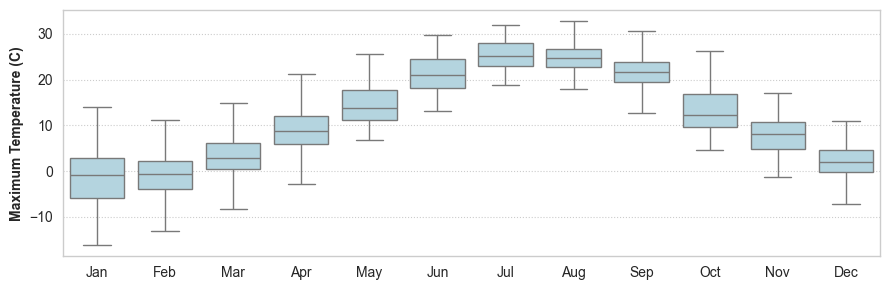

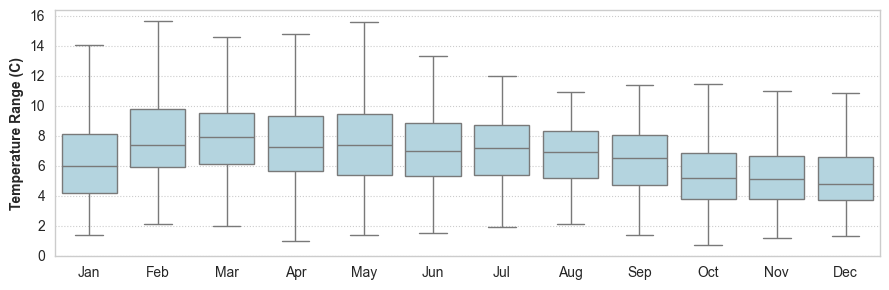

In [18]:
print('Bordj Badji Mokhtar:\n')
vf.generate_boxplots(data=df_clean_bbm, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

print('\n\nToronto:\n')
vf.generate_boxplots(data=df_clean_to, columns=cols_to_plot, granularity='month',
                     alternate_x_labels=month_label_abbr, y_labels=y_labels,
                    figsize=(9,3), label_font_size=10, tick_font_size=10)

In [19]:
df_clean_bbm.drop(['year', 'month','day_of_year'], axis=1, inplace=True)
df_clean_to.drop(['year', 'month','day_of_year'], axis=1, inplace=True)

print('Bordj Badji Mokhtar:\n')
display(df_clean_bbm.describe())

print('Toronto:\n')
display(df_clean_to.describe()) 

Bordj Badji Mokhtar:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,11.122673,18.664670,19.816190,28.004245,34.968168,15.163239
std,0.848900,7.811861,7.454255,7.531770,7.343353,2.608496
min,9.295532,4.291667,2.400000,11.012500,16.650000,7.500000
25%,10.309431,12.750000,13.525000,21.479167,28.700000,13.500000
50%,11.331722,17.104167,21.200000,30.025000,36.900000,15.300000
75%,12.000000,23.500000,26.600000,35.087500,41.500000,17.000000
max,12.084483,43.687500,31.825000,38.766667,46.000000,21.800000


Toronto:



,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,8.325474,72.728836,4.961213,8.329851,11.732092,6.753012
std,4.224756,10.440359,10.427141,10.371591,10.433801,2.705928
min,0.000000,37.708333,-24.400000,-20.158333,-16.200000,0.700000
25%,5.692690,65.250000,-2.300000,0.450000,3.225000,4.700000
50%,8.875101,72.687500,4.800000,7.902083,11.100000,6.600000
75%,11.848292,80.500000,14.456250,17.992708,21.187500,8.500000
max,14.366889,99.000000,24.975000,27.987500,32.775000,15.650000


# Experiments

In [20]:
import warnings
warnings.filterwarnings(
    "ignore"
)

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import logging
logging.disable(logging.CRITICAL)


# data processing
from darts import concatenate
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
import datetime
import importlib
import numpy as np
import pandas as pd
import random
# import requests
from sklearn.preprocessing import MinMaxScaler
import sys
import time

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from darts.models import RandomForest
from darts.utils.callbacks import TFMProgressBar
from darts.utils.utils import SeasonalityMode

# metrics
from darts.metrics import mae, r2_score, rmse

## Random Forest Test 

### Bordj Badji Mokhtar

#### Experiment with outlier-free dataset

In [21]:
# importlib.reload(pf) 
target_bbm = pf.create_timeseries(df_clean_bbm, 'sunshine_hr')

# create stacked timeseries for past covariates
past_covariates_bbm = pf.get_covariate_ts(df_clean_bbm)

# create training, testing, and validation datasets

training_cutoff = pd.Timestamp(year=2006, month=12, day=24)
validation_cutoff = pd.Timestamp(year=2006, month=12, day=17)

target_train_bbm, target_test_bbm = target_bbm.split_after(training_cutoff)
target_train_bbm, target_val_bbm = target_train_bbm.split_after(validation_cutoff)

covariates_train_bbm, covariates_test_bbm = past_covariates_bbm.split_after(training_cutoff)
covariates_train_bbm, covariates_val_bbm = covariates_train_bbm.split_after(validation_cutoff)

target_scaler_bbm = Scaler()
target_train_trsf_bbm = target_scaler_bbm.fit_transform(target_train_bbm)
target_val_trf_bbm = target_scaler_bbm.transform(target_val_bbm)

covariate_scaler_bbm = Scaler()
covariates_train_trsf_bbm = covariate_scaler_bbm.fit_transform(covariates_train_bbm)
covariates_val_trsf_bbm = covariate_scaler_bbm.transform(covariates_val_bbm)


In [22]:
# grid search 

np.random.seed(0)

test_size = 7 
parameters_rf = {
            'lags': [1, 3, 5, 7], 
            'lags_past_covariates': [1, 3, 5, 7],
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [2, 3, 5, 8],
            'output_chunk_length': [test_size]
        }

start_time = time.perf_counter() 
model_bbm, best_parameters_bbm, rmse_score_bbm = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_trsf_bbm, 
                past_covariates=covariates_train_trsf_bbm, 
                val_series=target_val_trf_bbm, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')


Completed grid search in 4.17 minutes.


In [23]:
print(f'Best Model Parameters: {best_parameters_bbm}')
print(f'RMSE: {rmse_score_bbm:.4f}')

Best Model Parameters: {'lags': 3, 'lags_past_covariates': 1, 'n_estimators': 200, 'max_depth': 8, 'output_chunk_length': 7}
RMSE: 0.0061


The grid search returns the following: 1) a tuple containing an *untrained* model_class instance created from the best-performing hyper-parameters; 2) a dictionary containing these best hyper-parameters; and 3)the metric score for the best hyper-parameters.

In [24]:
# testing 

num_predictions = 7

target_train_bbm, target_test_bbm = target_bbm.split_after(training_cutoff)
covariates_train_bbm, covariates_test_bbm = past_covariates_bbm.split_after(training_cutoff)

target_scaler_bbm = Scaler()
target_train_trsf_bbm = target_scaler_bbm.fit_transform(target_train_bbm)
target_test_trsf_bbm = target_scaler_bbm.transform(target_test_bbm)

covariate_scaler_bbm = Scaler()
covariates_train_trf_bbm = covariate_scaler_bbm.fit_transform(covariates_train_bbm)
covariates_test_trf_bbm = covariate_scaler_bbm.transform(covariates_test_bbm)

# use the unfitted model that was returned by the grid search
model_bbm.fit(
    series=target_train_trsf_bbm,
    past_covariates=covariates_train_trf_bbm
)

y_pred = model_bbm.predict(num_predictions)
rmse_bbm = rmse(y_pred, target_test_trsf_bbm[:num_predictions])
mae_bbm = mae(y_pred, target_test_trsf_bbm[:num_predictions])


In [25]:
print(f"RMSE score of {rmse_bbm:.4f} vs. El-kenawy et al.'s reported 0.1541 RMSE.")
print(f"MAE score of {mae_bbm:.4f} vs. El-kenawy et al.'s reported 0.1194 MAE.")

RMSE score of 0.0156 vs. El-kenawy et al.'s reported 0.1541 RMSE.
MAE score of 0.0155 vs. El-kenawy et al.'s reported 0.1194 MAE.


#### Experiment with unadjusted outliers

In [26]:
df_bbm = df_daily_bbm.copy().drop(['year', 'month','day_of_year'], axis=1)
target_bbm = pf.create_timeseries(df_bbm, 'sunshine_hr')
past_covariates_bbm = pf.get_covariate_ts(df_bbm)

# create training, testing, and validation datasets
target_train_bbm, target_test_bbm = target_bbm.split_after(training_cutoff)
target_train_bbm, target_val_bbm = target_train_bbm.split_after(validation_cutoff)

covariates_train_bbm, covariates_test_bbm = past_covariates_bbm.split_after(training_cutoff)
covariates_train_bbm, covariates_val_bbm = covariates_train_bbm.split_after(validation_cutoff)

target_scaler_bbm = Scaler()
target_train_trsf_bbm = target_scaler_bbm.fit_transform(target_train_bbm)
target_val_trf_bbm = target_scaler_bbm.transform(target_val_bbm)

covariate_scaler_bbm = Scaler()
covariates_train_trsf_bbm = covariate_scaler_bbm.fit_transform(covariates_train_bbm)
covariates_val_trsf_bbm = covariate_scaler_bbm.transform(covariates_val_bbm)


In [27]:
# grid search 

np.random.seed(0)

test_size = 7 
parameters_rf = {
            'lags': [1, 3, 5, 7], 
            'lags_past_covariates': [1, 3, 5, 7],
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [2, 3, 5, 8],
            'output_chunk_length': [test_size]
        }

start_time = time.perf_counter() 
model_bbm2, best_parameters_bbm2, rmse_score_bbm2 = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_trsf_bbm, 
                past_covariates=covariates_train_trsf_bbm, 
                val_series=target_val_trf_bbm, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')


Completed grid search in 4.06 minutes.


In [28]:
print(f'Best Model Parameters: {best_parameters_bbm2}')
print(f'RMSE: {rmse_score_bbm2:.4f}')

Best Model Parameters: {'lags': 1, 'lags_past_covariates': 7, 'n_estimators': 50, 'max_depth': 2, 'output_chunk_length': 7}
RMSE: 0.0089


In [29]:
# testing 

num_predictions = 7

target_train_bbm, target_test_bbm = target_bbm.split_after(training_cutoff)
covariates_train_bbm, covariates_test_bbm = past_covariates_bbm.split_after(training_cutoff)

target_scaler_bbm = Scaler()
target_train_trsf_bbm = target_scaler_bbm.fit_transform(target_train_bbm)
target_test_trsf_bbm = target_scaler_bbm.transform(target_test_bbm)

covariate_scaler_bbm = Scaler()
covariates_train_trf_bbm = covariate_scaler_bbm.fit_transform(covariates_train_bbm)
covariates_test_trf_bbm = covariate_scaler_bbm.transform(covariates_test_bbm)

# use the unfitted model that was returned by the grid search
model_bbm2.fit(
    series=target_train_trsf_bbm,
    past_covariates=covariates_train_trf_bbm
)

y_pred2 = model_bbm2.predict(num_predictions)
rmse_bbm2 = rmse(y_pred2, target_test_trsf_bbm[:num_predictions])
mae_bbm2 = mae(y_pred2, target_test_trsf_bbm[:num_predictions])


In [30]:
print(f"RMSE score of {rmse_bbm2:.4f} vs. El-kenawy et al.'s reported 0.1541 RMSE.")
print(f"MAE score of {mae_bbm2:.4f} vs. El-kenawy et al.'s reported 0.1194 MAE.")

RMSE score of 0.0151 vs. El-kenawy et al.'s reported 0.1541 RMSE.
MAE score of 0.0151 vs. El-kenawy et al.'s reported 0.1194 MAE.


Let us assess RMSE scores relative to the converted values

In [31]:
converted_ypred_bbm = target_scaler_bbm.inverse_transform(y_pred2)
rmse_bbm2_new = rmse(converted_ypred_bbm, target_test_bbm[:num_predictions])
mae_bbm2_new = mae(converted_ypred_bbm, target_test_bbm[:num_predictions])

In [32]:
print(f"RMSE score of {rmse_bbm2_new:.4f} vs. El-kenawy et al.'s reported 0.1541 RMSE.")
print(f"MAE score of {mae_bbm2_new :.4f} vs. El-kenawy et al.'s reported 0.1194 MAE.")

RMSE score of 0.1822 vs. El-kenawy et al.'s reported 0.1541 RMSE.
MAE score of 0.1820 vs. El-kenawy et al.'s reported 0.1194 MAE.


We now repeat the experiment using the Toronto data. 

### Toronto

In [33]:
target_to = pf.create_timeseries(df_clean_to, 'sunshine_hr')

# create stacked timeseries for past covariates
past_covariates_to = pf.get_covariate_ts(df_clean_to)


# create training, testing, and validation datasets
target_train_to, target_test_to = target_to.split_after(training_cutoff)
target_train_to, target_val_to = target_train_to.split_after(validation_cutoff)

covariates_train_to, covariates_test_to = past_covariates_to.split_after(training_cutoff)
covariates_train_to, covariates_val_to = covariates_train_to.split_after(validation_cutoff)

target_scaler_to = Scaler()
target_train_trsf_to = target_scaler_to.fit_transform(target_train_to)
target_val_trf_to = target_scaler_to.transform(target_val_to)

covariate_scaler_to = Scaler()
covariates_train_trsf_to = covariate_scaler_to.fit_transform(covariates_train_to)
covariates_val_trsf_to = covariate_scaler_to.transform(covariates_val_to)


In [34]:
# grid search 

np.random.seed(0)

start_time = time.perf_counter() 
model_to, best_parameters_to, rmse_score_to = RandomForest.gridsearch(
                parameters=parameters_rf, 
                series=target_train_trsf_to, 
                past_covariates=covariates_train_trsf_to, 
                val_series=target_val_trf_to, 
                use_fitted_values=False, 
                metric=rmse
            )

end_time = time.perf_counter() 
total_grid_search_time = (end_time - start_time) / 60

print(f'Completed grid search in {total_grid_search_time:.2f} minutes.')


Completed grid search in 4.39 minutes.


In [35]:
print(f'Best model Parameters: {best_parameters_to}')
print(f'RMSE: {rmse_score_to:.4f}')

Best model Parameters: {'lags': 3, 'lags_past_covariates': 7, 'n_estimators': 100, 'max_depth': 8, 'output_chunk_length': 7}
RMSE: 0.1936


In [36]:
# testing 

target_train_to, target_test_to = target_to.split_after(training_cutoff)
covariates_train_to, covariates_test_to = past_covariates_to.split_after(training_cutoff)

target_scaler_to = Scaler()
target_train_trsf_to = target_scaler_to.fit_transform(target_train_to)
target_test_trsf_to = target_scaler_to.transform(target_test_to)

covariate_scaler_to = Scaler()
covariates_train_trf_to = covariate_scaler_to.fit_transform(covariates_train_to)
covariates_test_trf_to = covariate_scaler_to.transform(covariates_test_to)

# use the unfitted model that was returned by the grid search
model_to.fit(
    series=target_train_trsf_to,
    past_covariates=covariates_train_trf_to
)

y_pred_to = model_to.predict(num_predictions)
rmse_to = rmse(y_pred_to, target_test_trsf_to[:num_predictions])
mae_to = mae(y_pred_to, target_test_trsf_to[:num_predictions])

In [37]:
print(f"RMSE score of {rmse_to:.4f} vs. El-kenawy et al.'s reported 0.1541 RMSE.")
print(f"MAE score of {mae_to:.4f} vs. El-kenawy et al.'s reported 0.1194 MAE.")

RMSE score of 0.1498 vs. El-kenawy et al.'s reported 0.1541 RMSE.
MAE score of 0.1363 vs. El-kenawy et al.'s reported 0.1194 MAE.


Let us assess RMSE scores relative to the converted values 

In [38]:
converted_ypred_to = target_scaler_to.inverse_transform(y_pred_to)
rmse_to_new = rmse(converted_ypred_to, target_test_to[:num_predictions])
mae_to_new = mae(converted_ypred_to, target_test_to[:num_predictions])

In [39]:
print(f"RMSE score of {rmse_to_new:.4f} vs. El-kenawy et al.'s reported 0.1541 RMSE.")
print(f"MAE score of {mae_to_new:.4f} vs. El-kenawy et al.'s reported 0.1194 MAE.")

RMSE score of 2.1524 vs. El-kenawy et al.'s reported 0.1541 RMSE.
MAE score of 1.9584 vs. El-kenawy et al.'s reported 0.1194 MAE.


As we can see, the results for Toronto are significantly worse than those for Bordj Badji Mokhtar.

In [40]:
# save bbm data with outliers 
df_daily_all = pf.daily_aggregations_v2(weather_bbm)
df_daily_all['temp_range'] = df_daily_all['temp_max'] - df_daily_all['temp_min']
df_daily_all.head()

,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
date,,,,,,
1994-01-01,10.0,29.833333,5.9,13.366667,20.8,14.9
1994-01-02,10.0,31.666667,3.2,12.654167,21.1,17.9
1994-01-03,10.0,23.958333,5.7,15.166667,24.3,18.6
1994-01-04,10.0,20.166667,9.2,17.145833,25.7,16.5
1994-01-05,10.0,23.708333,9.0,17.154167,25.6,16.6


In [41]:
df_daily_all.to_csv('weather_bbm_incl_outliers.csv')

In [42]:
df_daily_all.describe()

,sunshine_hr,humidity_mean,temp_min,temp_mean,temp_max,temp_range
count,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000
mean,10.820973,18.812570,20.045587,28.040200,34.975997,14.930410
std,1.250392,8.893567,7.583512,7.480956,7.170943,2.650838
min,0.000000,3.291667,1.400000,7.554167,13.100000,3.500000
25%,10.110119,12.541667,13.400000,21.275000,28.800000,13.200000
50%,10.817328,17.083333,21.100000,29.658333,36.700000,15.000000
75%,11.918311,23.083333,26.900000,35.033333,41.400000,16.800000
max,12.084744,85.708333,34.800000,41.045833,46.900000,24.300000
